In [1]:
import pandas as pd
import numpy as np
import math
import os

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
attr_dict = {
    'min_temp': ('mnt', 'Temperatur minimum', u"\u2103"),
    'max_temp': ('mxt', 'Temperatur maksimum', u"\u2103"),
    'avg_temp': ('avgt', 'Temperatur rata-rata', u"\u2103"),
    'avg_humidity': ('hum', 'Kelembapan rata-rata', "Persentase (%)"),
    'sunshine': ('sun', 'Penyinaran matahari', "Jam"),
    'rainfall': ('rain', 'Curah hujan', "milimeter (mm)"),
}

# ATTR_CODE = attr_dict[ATTR_NOW][0]
# ATTR_NAME = attr_dict[ATTR_NOW][1]
# ATTR_UNIT = attr_dict[ATTR_NOW][2]

In [3]:
df = pd.read_csv('iklim_sulut_clean.csv')
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.set_index('date', inplace=True)
df

,min_temp,max_temp,avg_temp,avg_humidity,rainfall,sunshine
date,,,,,,
2016-01-01,19.0,27.6,24.1,85.0,NaN,4.1
2016-01-02,20.0,28.0,23.2,89.0,NaN,8.6
2016-01-03,21.0,27.9,23.7,84.0,NaN,8.4
2016-01-04,20.0,27.4,22.5,89.0,9.0,3.3
2016-01-05,18.0,27.0,21.4,93.0,34.5,3.5
...,...,...,...,...,...,...
2022-03-27,18.6,28.5,23.1,88.0,NaN,3.3
2022-03-28,20.9,28.8,24.2,84.0,0.0,7.6
2022-03-29,21.6,27.0,22.0,93.0,0.0,6.2


# Checking Function

In [4]:
def check_missing(column, title):
    plt.figure(figsize=(16,1))
    plt.plot(column.isna())
    plt.figure(figsize=(16,4))
    plt.ylabel(title)
    plt.plot(column)
    print(f'total missing data : {column.isna().sum()}')

# Plot Seasonal Decompose

In [5]:
def plot_decompose(column, model, title, unit):
    comp = seasonal_decompose(column, model=model, period=365)
    
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.suptitle(title, fontsize=14)
    plt.title('seasonal', fontsize=12)
    plt.ylabel('data')
    comp.seasonal.plot()
    plt.subplot(1,2,2)
    plt.title('trend', fontsize=12)
    plt.ylabel(unit)
    comp.trend.plot()
    
    plt.figure(figsize=(14,4))
    plt.title('residuals', fontsize=12)
    comp.resid.plot()

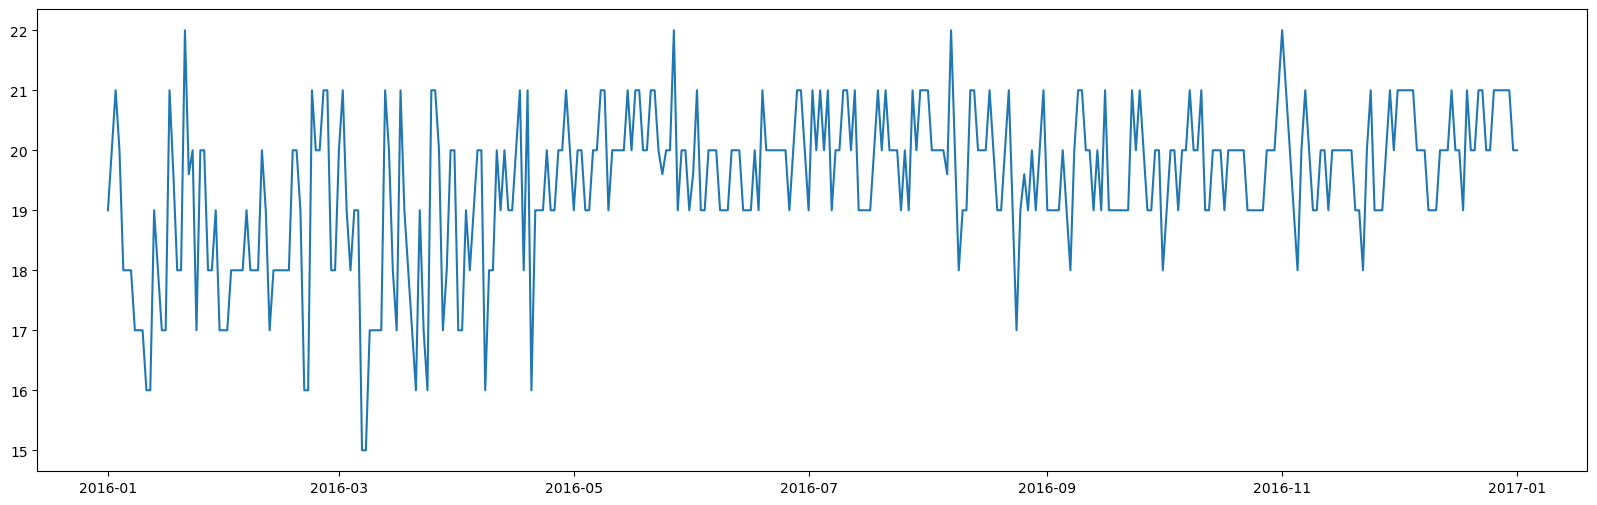

In [6]:
plt.figure(figsize=(20,6))
plt.plot(df.min_temp.loc['2016-01-01':'2017-01-01'])

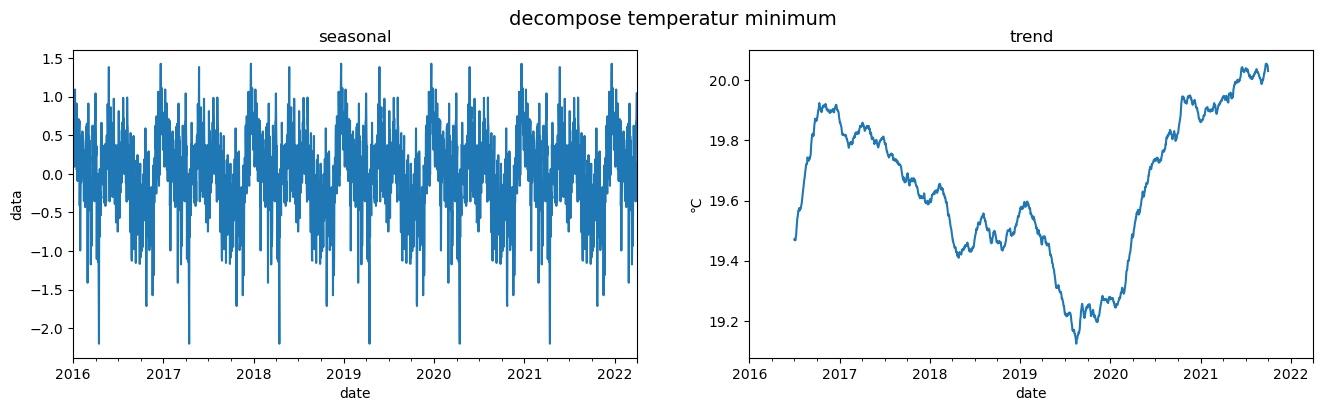

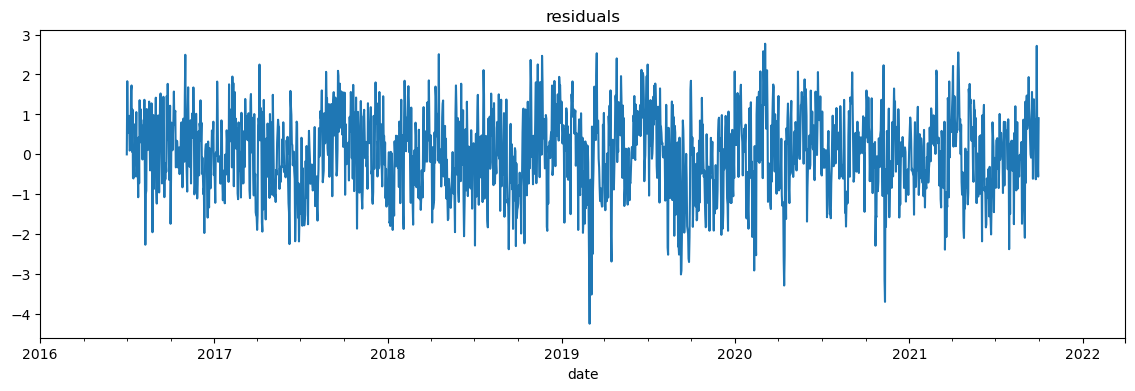

In [7]:
plot_decompose(df.min_temp, model='additive', title='decompose temperatur minimum', unit=attr_dict['min_temp'][2])

# Save Dataset to csv

In [ ]:
def save_dataset(df, filename):
    outdir = './attributes_dataset'
    if not os.path.exists(outdir):
        os.mkdir(outdir)

    fullname = os.path.join(outdir, filename)    

    df.to_csv(fullname)

# Min Temp

total missing data : 0


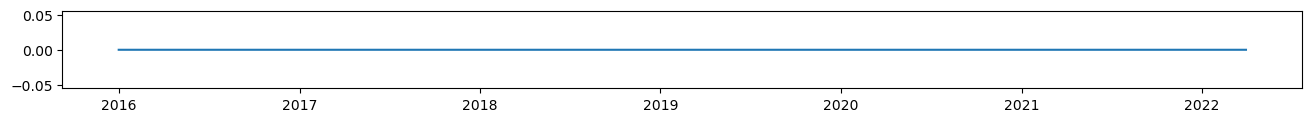

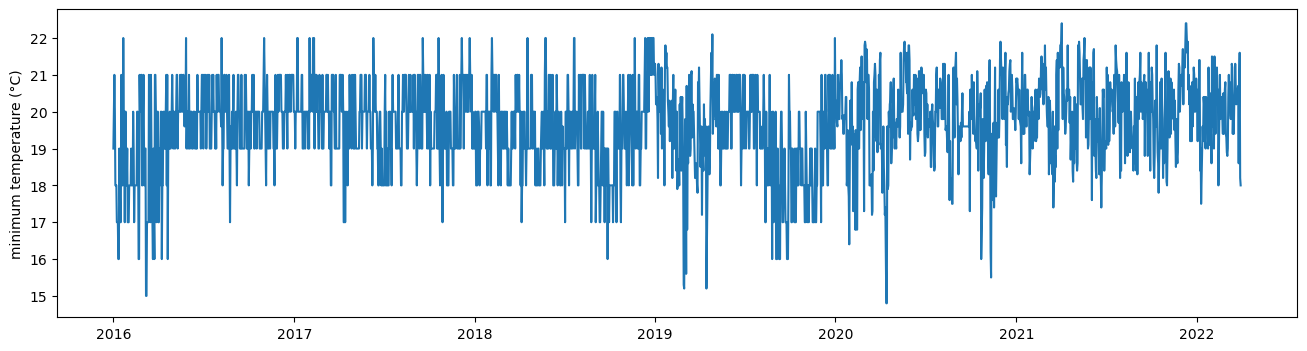

In [9]:
check_missing(df.min_temp, 'minimum temperature (\u00B0C)')

In [10]:
df.min_temp.describe()

count    2282.000000
mean       19.637336
std         1.199401
min        14.800000
25%        19.000000
50%        20.000000
75%        20.400000
max        22.400000
Name: min_temp, dtype: float64

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df.min_temp.loc['2016-01-01':'2017-01-01'])

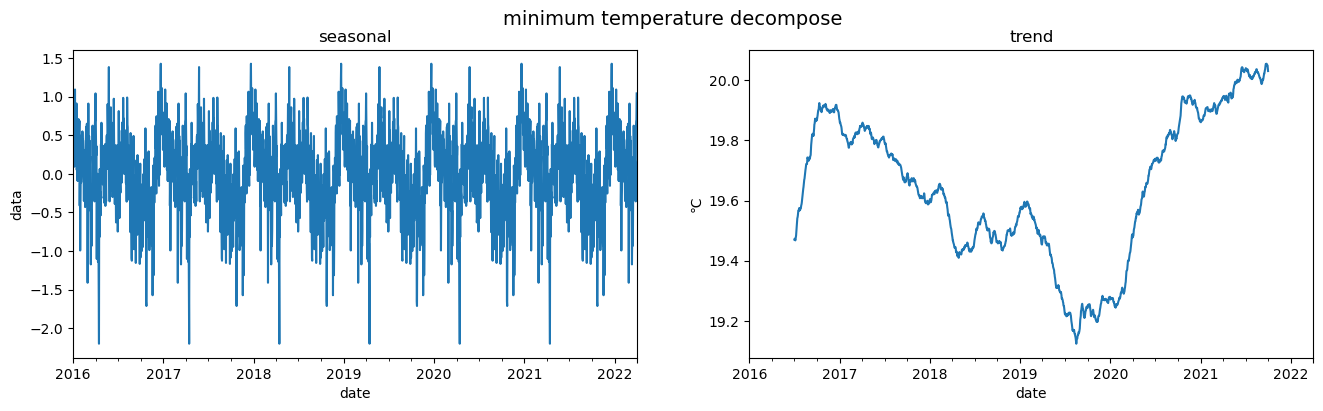

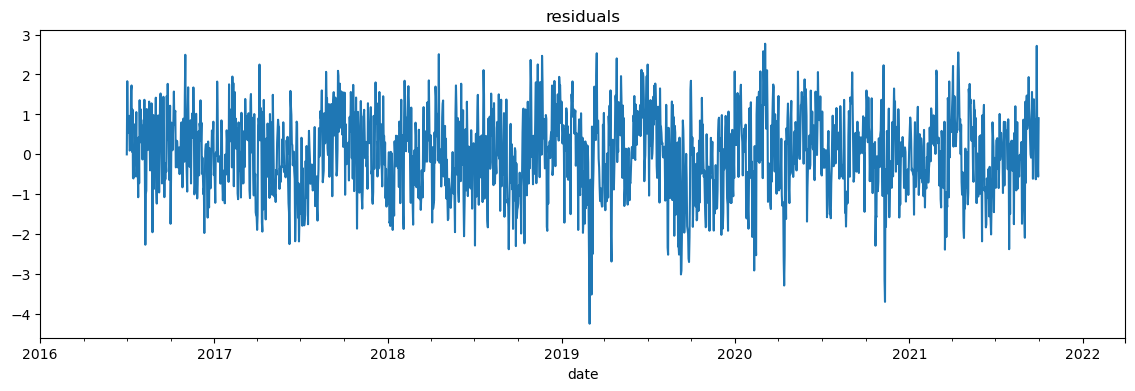

In [12]:
plot_decompose(df.min_temp, model='additive', title="minimum temperature decompose", unit=attr_dict['min_temp'][2])

# Max Temp

total missing data : 0


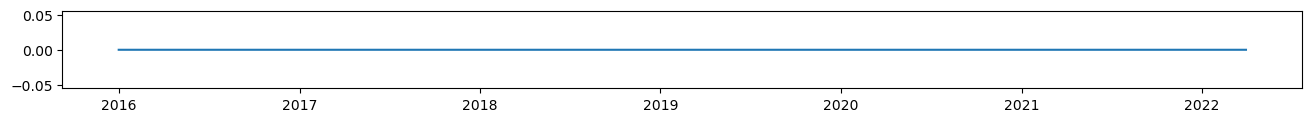

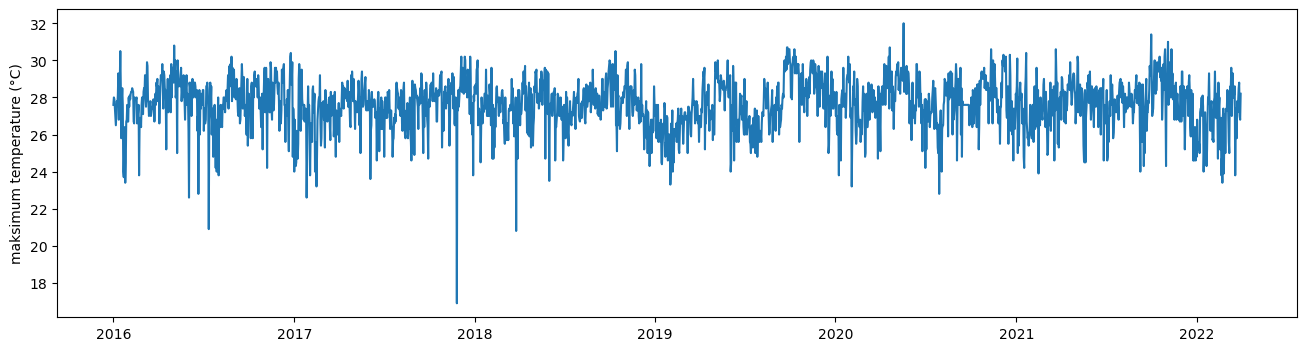

In [13]:
check_missing(df.max_temp, 'maksimum temperature (\u00B0C)')

In [ ]:
df.max_temp.describe()

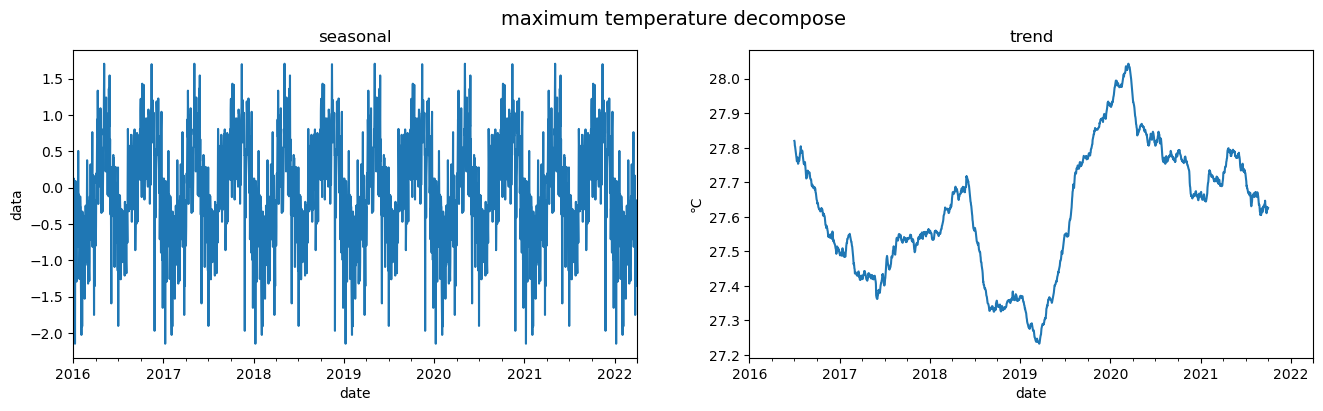

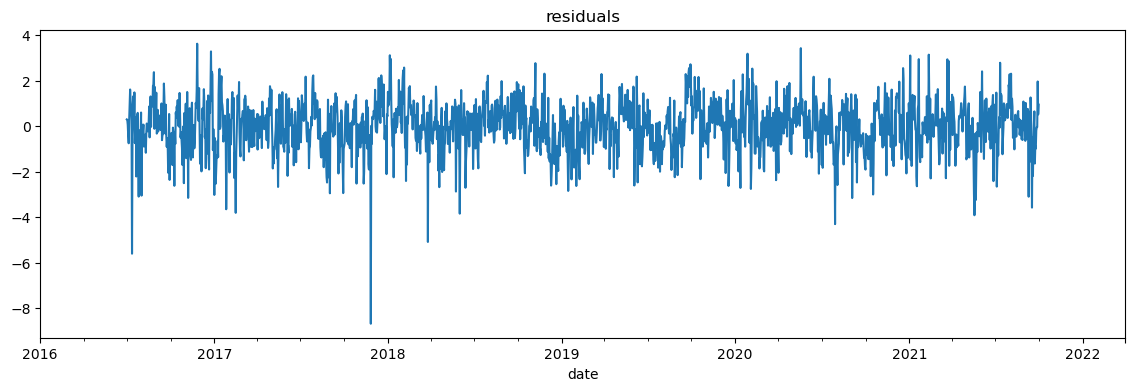

In [15]:
plot_decompose(df.max_temp, model='additive', title='maximum temperature decompose', unit=attr_dict['max_temp'][2])

# Avg Temp

total missing data : 0


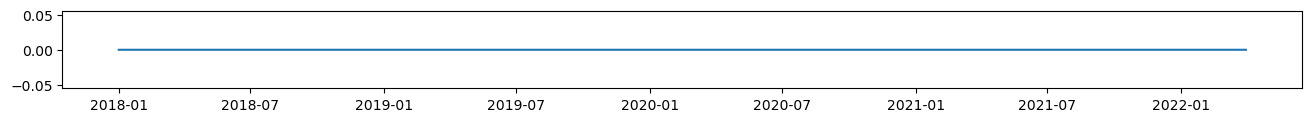

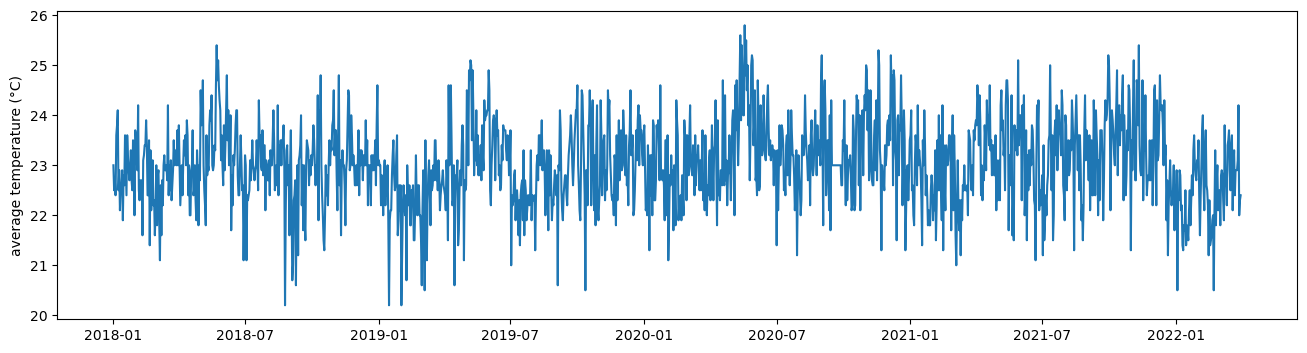

In [16]:
check_missing(df.avg_temp.loc['2018-01-01':], 'average temperature (\u00B0C)')

In [18]:
df.avg_temp.loc['2018-01-01':].describe()

count    1551.000000
mean       23.026821
std         0.846482
min        20.200000
25%        22.500000
50%        23.000000
75%        23.600000
max        25.800000
Name: avg_temp, dtype: float64

In [ ]:
avg_temp = df.loc['2018-01-01':, 'avg_temp']
df_avg_temp = pd.DataFrame(avg_temp)
df_avg_temp.head()

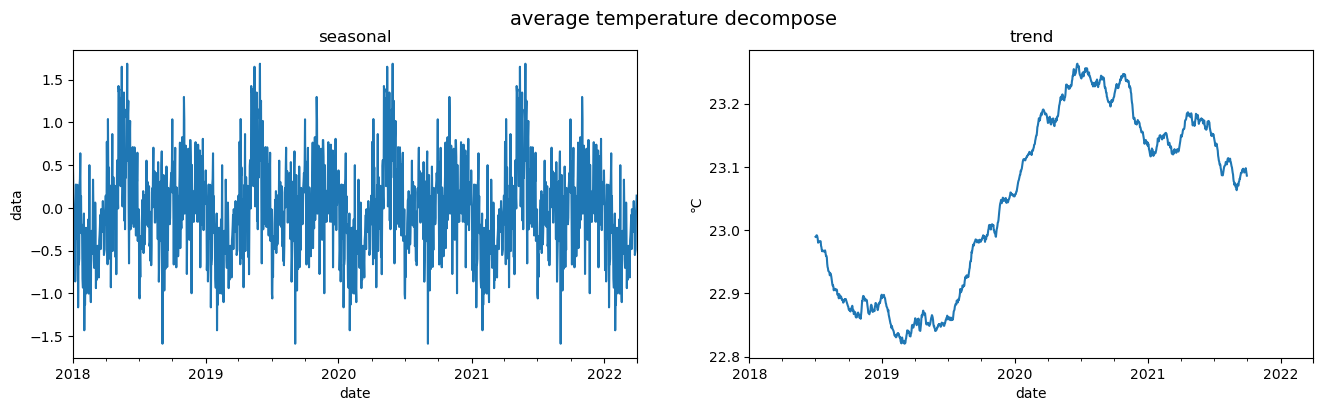

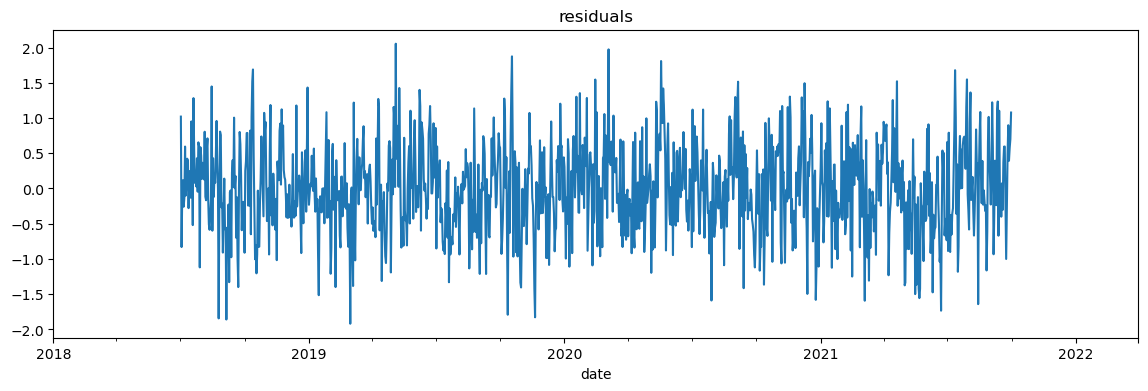

In [19]:
plot_decompose(df.avg_temp.loc['2018-01-01':],model='additive', title='average temperature decompose', unit=attr_dict['avg_temp'][2])

# Avg Humidity

total missing data : 0


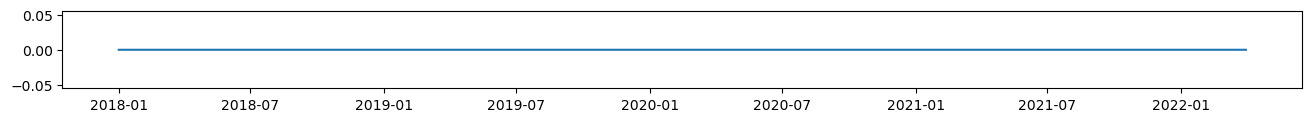

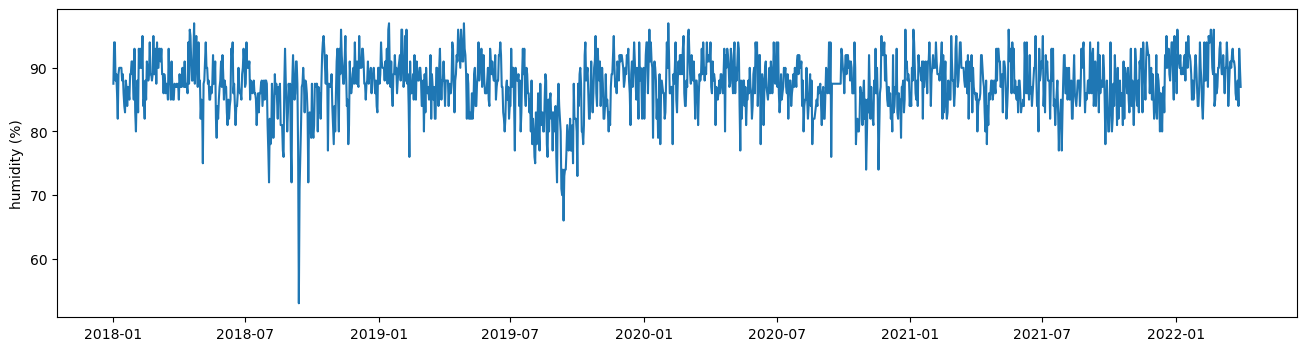

In [20]:
check_missing(df.avg_humidity.loc['2018-01-01':], 'humidity (%)')

In [ ]:
df.avg_humidity.loc['2018-01-01':].describe()

In [ ]:
avg_hum = df.loc['2018-01-01':, 'avg_humidity']
df_avg_hum = pd.DataFrame(avg_hum)
df_avg_hum.head()

In [ ]:
check_missing(df_avg_hum, 'kelembapan rata rata (%)')

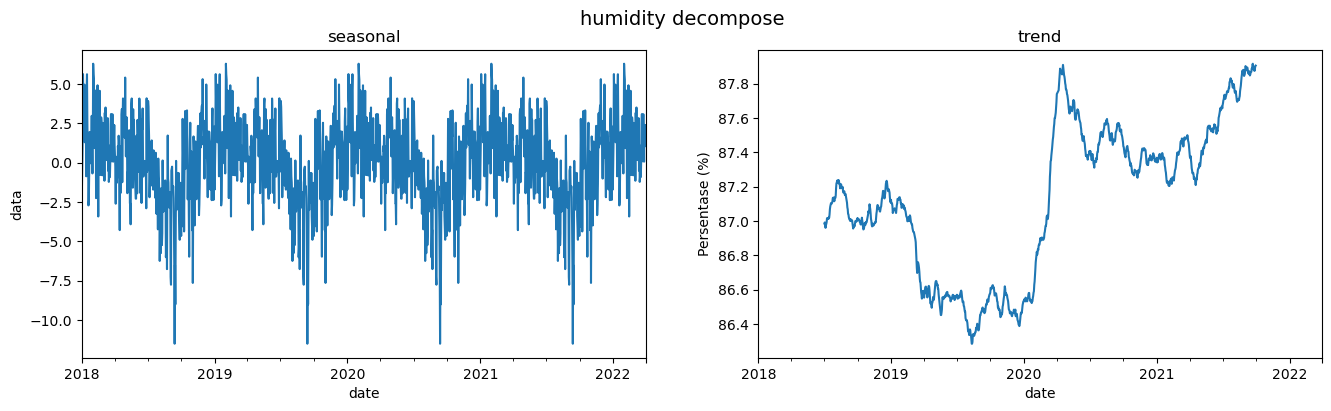

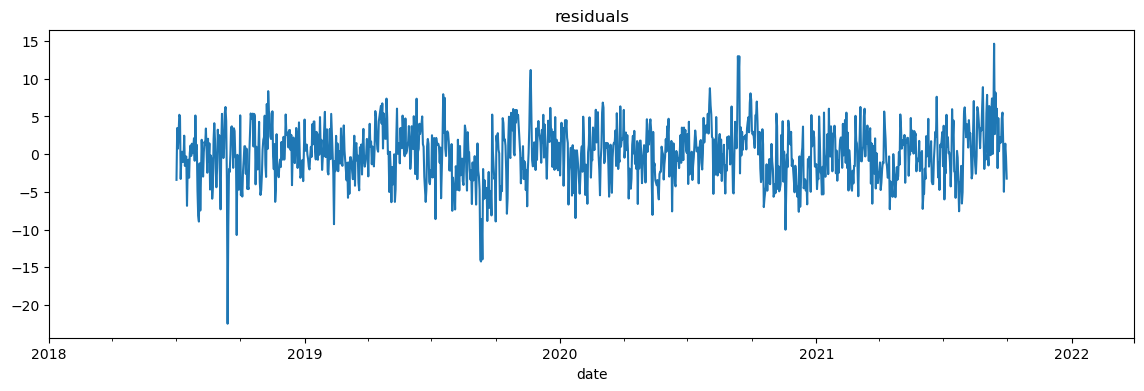

In [21]:
plot_decompose(df.avg_humidity.loc['2018-01-01':],model='additive', title='humidity decompose', unit=attr_dict['avg_humidity'][2])

# Sunshine

total missing data : 0


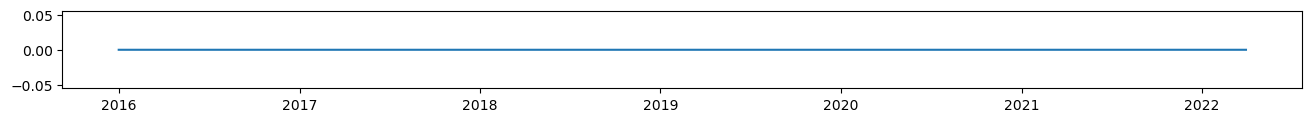

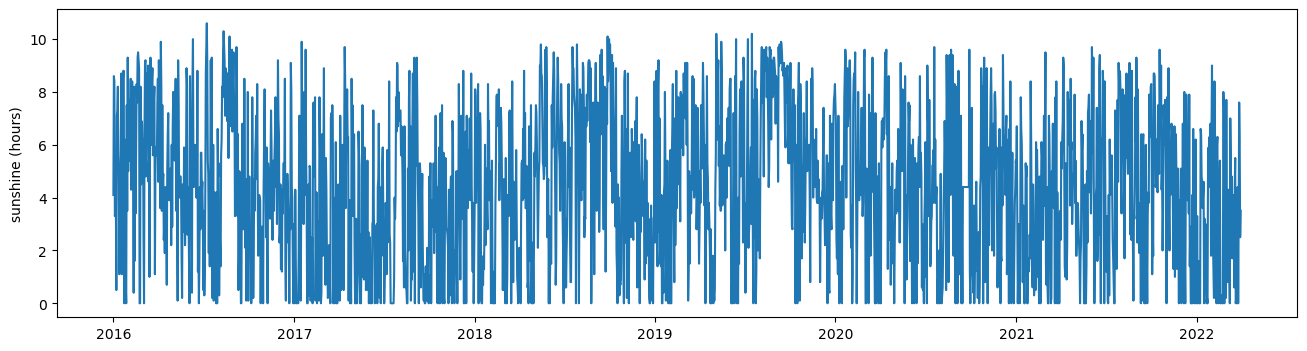

In [23]:
check_missing(df.sunshine, 'sunshine (hours)')

In [ ]:
df.sunshine.describe()

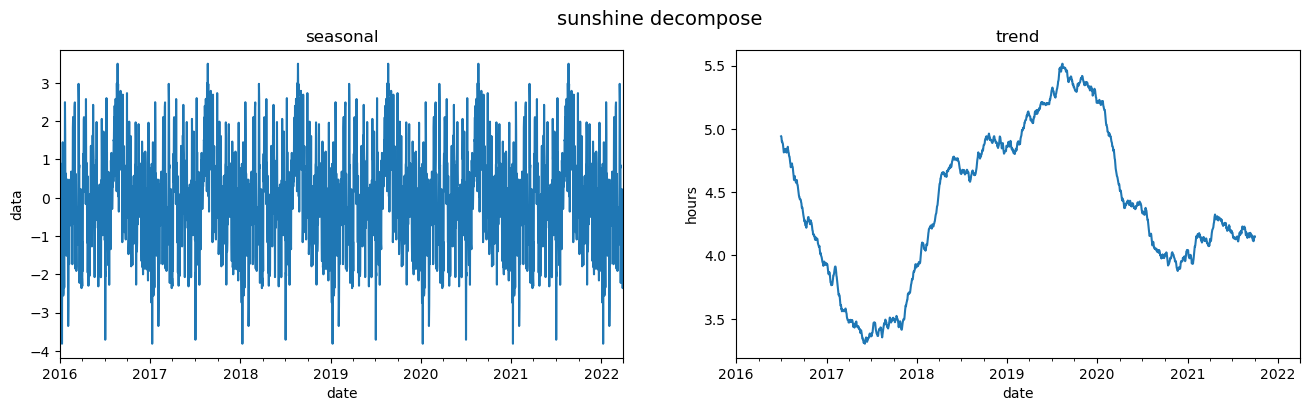

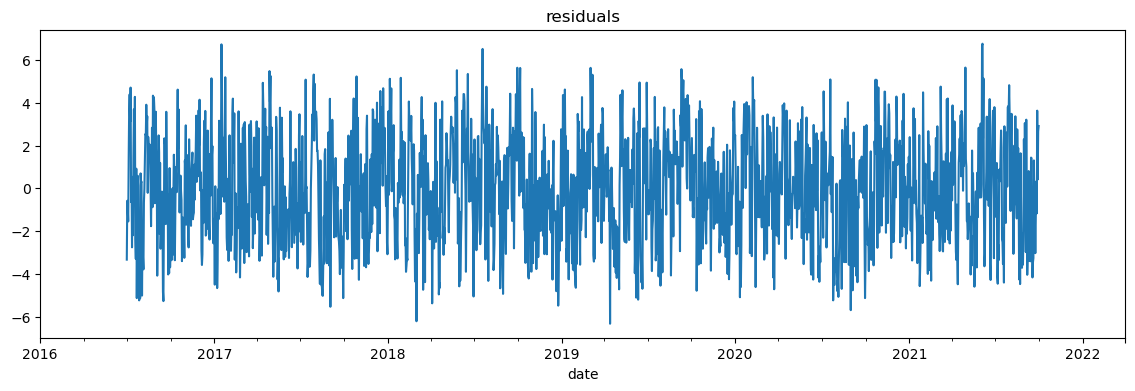

In [25]:
plot_decompose(df.sunshine,model='additive', title='sunshine decompose', unit='hours')

# Rainfall

In [ ]:
check_missing(df.rainfall['2020-01-01':], 'curah hujan (mm)')

In [26]:
df_rainfall = df[['rainfall']]['2020-01-01':]
df_rainfall.head()

,rainfall
date,
2020-01-01,0.2
2020-01-02,0.0
2020-01-03,0.5
2020-01-04,7.6
2020-01-05,4.3


In [27]:
for index, row in df_rainfall.iterrows():
    if math.isnan(row['rainfall']):
        df_rainfall.loc[index, 'rainfall'] = df_rainfall.mean()[0]

total missing data : rainfall    0
dtype: int64


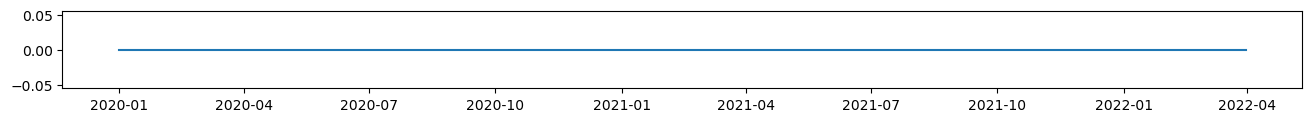

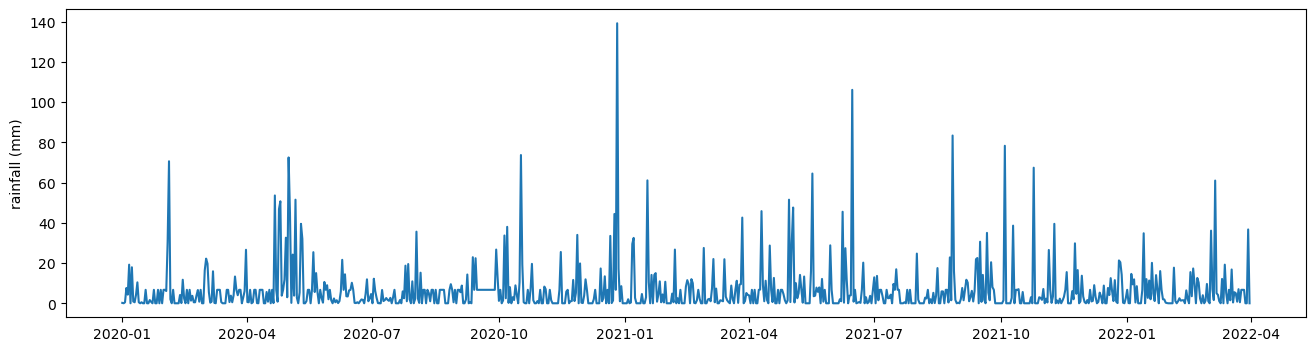

In [28]:
check_missing(df_rainfall, 'rainfall (mm)')

In [ ]:
df_rainfall.rainfall.describe()

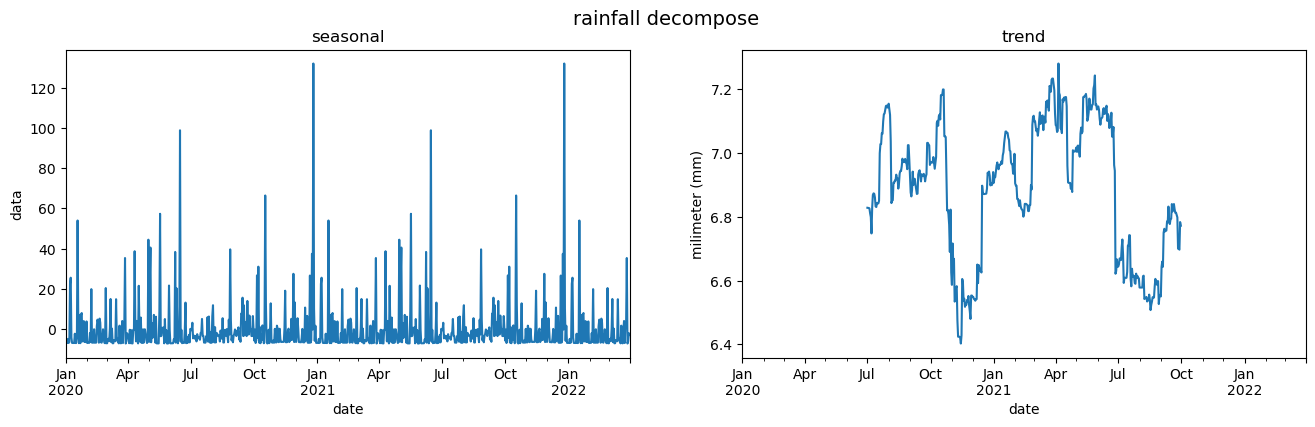

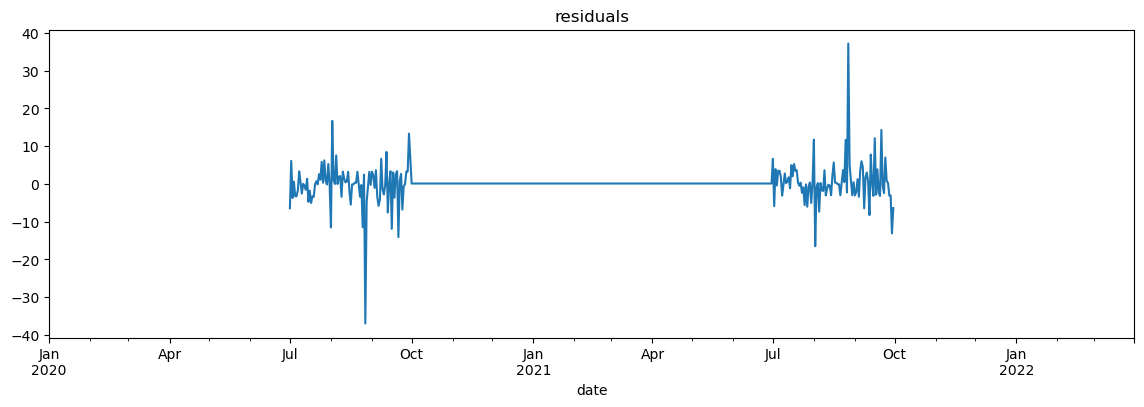

In [30]:
plot_decompose(df_rainfall.rainfall,model='additive', title='rainfall decompose', unit=attr_dict['rainfall'][2])